# Question 1

### 1. Simple vs. Multiple Linear Regression
Simple linear regression is a linear regression relationship modeled as a straight line represented by the equation $y=β_0+β_1x+ϵ$. In this relationship, there is a singular independent predictor variable and a singular dependent outcome variable.

Multiple linear regression is a linear regression relationship is modeled with multiple terms for each predictor taking the form of $y=β_0+β_1x_1+β_2x_2+⋯+β_nx_n+ϵ$, where each x is an independent variable and each β is the coefficient or slope for each predictor, which represents each individual predictors effect on y.

##### Benefit of Multiple Linear Regression
There are many different benefits to using multiple linear regression of simple linear regression:
- Using multiple predictors can allow us to capture our data in a more complex way, which could lead to better predictions. 
- By using multiple predictors we can also see the interactions between the predictors themselves, not just them and the result.
- This system allows us to isolate the effect of each predictor by holding the other predictors constant or "controlling them" we can isolate each variable and test for any confounding variables.

### 2. Continuous Vs. Indicator Variables in Simple Linear Regresssion
The difference between continuous and indicator variables in Simple Linear Regresssion, is that a continuous varaiable such as height or temperature is represented with a slope $β_1$ that describes the average change in the outcome variable per unit change in the continous predictor. For the equation $y=β_0+β_1x+ϵ$, x is the continous predictor, $β_0$ is the intercept or the value of y when x = 0, and $β_1$ is the aforementioned slope.

On the other hand, a predictor variable is one that only has two possible values, 1 and 0 which is used to indicate one of two categories, like yes/no. In this case $β_1$ represents the difference in the mean of y between the groups d = 1 and d = 0. For the equation $y=β_0+β_1d+ϵ$, $β_0$ represents the mean of y when d = 0.

### 3. Behvaiour Change In The Model With Both Continous and Indicator Variables
A simple linear regression is essentially just a model of a straight-line relationship where the slope coefficient represents the average change in the outcome variable per unit increase in the predictor variable. So then when we introduce an indicator variable to the continous variable we are creating two different lines, one for each group represented by the indicator variable of the form $Y_i = \beta_0 + \beta_1 x_i + \beta_2 1_{[\textrm{``some group''}]}(k_i) + \epsilon_i$, where $beta_2$ represents the difference in the average outcome variable between the group indicated by the variable ($1_{[\text{group}]}(k_i) = 1$) and the reference group ($1_{[\text{group}]}(k_i) = 0$). So for a relationship between x and y, the indicator would capture the difference in average between x and y in the group where the indicator variable is 1, and the group where it is 0.

All of this is represented in the change of linear form from $Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$ to $Y_i = \beta_0 + \beta_1 x_i + \beta_2 1_{[\textrm{``some group''}]}(k_i) + \epsilon_i$.

### 4. Adding an Interaction Between The Continous And Indicator Variables
When we add an interaction term between the continuous and indicator variables we can model the varying slopes between these two groups. So for example while $1_{[\textrm{some group 1}]}(k_i) = 0$, the slope is just $\beta_1$, but for some group 1 we have $1_{[\textrm{some group 1}]}(k_i) = 1$, so the slope here is now $\beta_1 + \beta_3$.

It is represented in the linear form: $Y_i = \beta_0 + \beta_1 x_{i} + \beta_2 1_{[\textrm{some group}]}(k_i) + \beta_3 x_{i} \times 1_{[\textrm{some group}]}(k_{i}) + \epsilon_i$.

### 5. Indicator Variables from Non-Binary Variables in Multiple Linear Regression
When we are usin only indicator variables derived from a non-binary categorical variable in a Multiple Linear Regression model, the model represents the categorical variable using a series of binary indicator variables. The number of indicator variables required is one less than the number of categories ($K-1$) in the categorical variable.

It is of the linear form $Y_i = \beta_0 + \beta_2 1_{[\textrm{some group 2}]}(k_i) + \beta_3 1_{[\textrm{some group 3}]}(k_i) + \cdots + \beta_K 1_{[\textrm{some group K}]}(k_i) + \epsilon_i$.

# Question 2

For this scenario, the outcome variable is the sales of sports equipment, which is what the company wants to predict. The predictor variables are the amount spent on TV advertising and the amount spent on online advertising.

To predict the outcome we might need to consider a potential interaction between TV advertising and online advertising, which might tell us how the collectively contribute, which one contributes more, or how the combination of their mediums might be different from the sum of each individual effect.

Linear form with potential interaction: $\text{Sales}_i = \beta_0 + \beta_1 \times \text{TV_advertising}_i + \beta_2 \times \text{Online_advertising}_i + \beta_3 \times \text{TV_advertising}_i \times \text{Online_advertising}_i + \epsilon_i$

Linear form without potential interaction: $\text{Sales}_i = \beta_0 + \beta_1 \times \text{TV_advertising}_i + \beta_2 \times \text{Online_advertising}_i + \epsilon_i$

# Question 3

In our analysis, we have two linear regression models designed to predict life satisfaction based on physical health, church attendance, and anxiety frequency.

Additive Model Summary:
                            OLS Regression Results                            
Dep. Variable:      life_satisfaction   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     21.58
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           9.11e-11
Time:                        03:51:04   Log-Likelihood:                -140.21
No. Observations:                 100   AIC:                             288.4
Df Residuals:                      96   BIC:                             298.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------


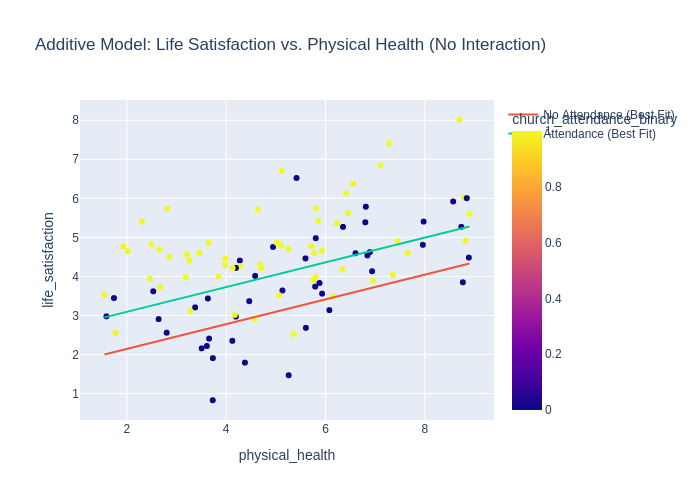

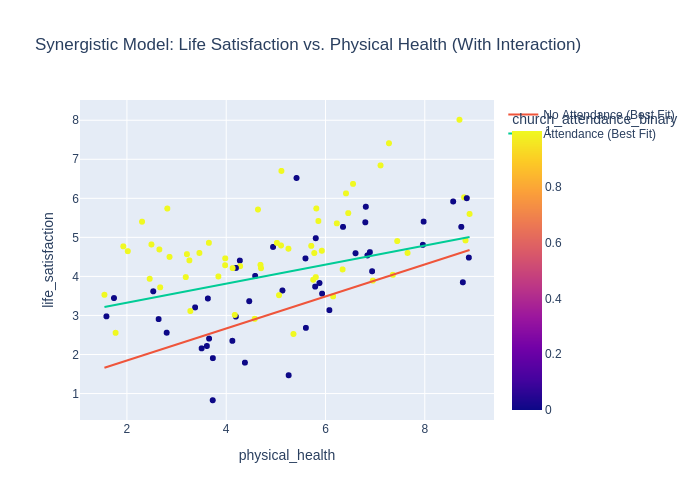

In [1]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import pandas as pd

# Simulate a dataset with binary and continuous predictors
np.random.seed(0)
sim_data = pd.DataFrame({
    'church_attendance_binary': np.random.choice([0, 1], size=100),
    'physical_health': np.random.normal(5, 2, size=100),  # Continuous variable
    'anxiety_frequency': np.random.normal(3, 1, size=100)  # Another predictor
})
sim_data['life_satisfaction'] = (2 + 0.5 * sim_data['church_attendance_binary'] +
                                 0.3 * sim_data['physical_health'] +
                                 0.2 * sim_data['anxiety_frequency'] +
                                 np.random.normal(0, 1, size=100))  # Outcome with noise

# Define the additive and synergistic (interaction) models
additive_formula = 'life_satisfaction ~ church_attendance_binary + physical_health + anxiety_frequency'
synergistic_formula = 'life_satisfaction ~ church_attendance_binary * physical_health + anxiety_frequency'

# Fit the models
additive_model = smf.ols(additive_formula, data=sim_data).fit()
synergistic_model = smf.ols(synergistic_formula, data=sim_data).fit()

# Display model summaries
print("Additive Model Summary:")
print(additive_model.summary())
print("\nSynergistic Model Summary:")
print(synergistic_model.summary())

# Prepare data for visualization of predictions
physical_health_range = np.linspace(sim_data['physical_health'].min(), sim_data['physical_health'].max(), 100)
church_attendance_options = [0, 1]

# Additive model predictions
additive_predictions = []
for attendance in church_attendance_options:
    for health in physical_health_range:
        pred = (additive_model.params['Intercept'] +
                additive_model.params['church_attendance_binary'] * attendance +
                additive_model.params['physical_health'] * health)
        additive_predictions.append((attendance, health, pred))

additive_df = pd.DataFrame(additive_predictions, columns=['church_attendance_binary', 'physical_health', 'life_satisfaction'])

# Synergistic model predictions (with interaction)
synergistic_predictions = []
for attendance in church_attendance_options:
    for health in physical_health_range:
        pred = (synergistic_model.params['Intercept'] +
                synergistic_model.params['church_attendance_binary'] * attendance +
                synergistic_model.params['physical_health'] * health +
                synergistic_model.params['church_attendance_binary:physical_health'] * attendance * health)
        synergistic_predictions.append((attendance, health, pred))

synergistic_df = pd.DataFrame(synergistic_predictions, columns=['church_attendance_binary', 'physical_health', 'life_satisfaction'])

# Plotting Additive Model
fig_additive = px.scatter(sim_data, x='physical_health', y='life_satisfaction', color='church_attendance_binary',
                          title='Additive Model: Life Satisfaction vs. Physical Health (No Interaction)')
fig_additive.add_traces(go.Scatter(x=additive_df['physical_health'], 
                                   y=additive_df[additive_df['church_attendance_binary'] == 0]['life_satisfaction'], 
                                   mode='lines', name='No Attendance (Best Fit)'))
fig_additive.add_traces(go.Scatter(x=additive_df['physical_health'], 
                                   y=additive_df[additive_df['church_attendance_binary'] == 1]['life_satisfaction'], 
                                   mode='lines', name='Attendance (Best Fit)'))

# Plotting Synergistic Model
fig_synergistic = px.scatter(sim_data, x='physical_health', y='life_satisfaction', color='church_attendance_binary',
                             title='Synergistic Model: Life Satisfaction vs. Physical Health (With Interaction)')
fig_synergistic.add_traces(go.Scatter(x=synergistic_df['physical_health'], 
                                      y=synergistic_df[synergistic_df['church_attendance_binary'] == 0]['life_satisfaction'], 
                                      mode='lines', name='No Attendance (Best Fit)'))
fig_synergistic.add_traces(go.Scatter(x=synergistic_df['physical_health'], 
                                      y=synergistic_df[synergistic_df['church_attendance_binary'] == 1]['life_satisfaction'], 
                                      mode='lines', name='Attendance (Best Fit)'))

# Show both figures
fig_additive.show(renderer="png")
fig_synergistic.show(renderer="png")

$life\_satisfactionβ0​+β1​⋅church\_attendance\_binary+β2​⋅physical\_health+β3⋅anxiety\_frequency$

- $\beta_0$ (Intercept): Represents the baseline level of life satisfaction for someone with no church attendance, the lowest physical health score, and the lowest anxiety frequency.
- $\beta_1$ (Church Attendance): This coefficient shows the effect of church attendance on life satisfaction. A positive $\beta_1$ means that attending church is associated with a higher life satisfaction score, regardless of physical health.
- $\beta_2$ (Physical Health): This coefficient measures how much life satisfaction increases or decreases for each unit increase in physical health, independent of church attendance.
- $\beta_3$ (Anxiety Frequency): Indicates the change in life satisfaction associated with each additional unit of anxiety frequency, holding other variables constant.

# Question 4

In this context, when we say the model only explains 17.6% of the variability in the data, this refers to the R-squared value, which measures how much of the outcome’s variability is accounted for by the predictors. A low R² suggests that the model accounts for only a small portion of the overall variability in the outcome. This could be due to several things such as:
- The model missing some important predictor variables that could help explain the variation in the outcome.
- The data might have a lot of random noise that can't be explained by any predictor variables.
- There isn't enough data to accurately estimate the model's parameters, so the model might not be able to capture the true relationships in the data.

On the other hand, the reason that many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect' is because p-values are calculated while controlling for the effects of other predictors in the model.
So even though the overall model might have a low R-squared value individual coefficients can still be statistically significant and have large magnitudes. Since the p-value for each coefficient tests the null hypothesis that the coefficient is zero while holding all other predictors constant, there can be strong evidence that the predictor variable has a relationship with the outcome variable, even after accounting for the effects of other predictors in the model.

So its basically the difference between how significant the whole model is as a whole vs each individual coeffient.

# Question 5

The **first** code block replaces any NaN values in the Type 2 column with 'None', handling any missing data for Pokémon secondary types. It then splits the dataset into a 50/50 training and testing set. This split ensures that half of the data is used to train the model (pokeaman_train), while the other half is used to evaluate its performance on unseen data (pokeaman_test).

We expect a 50/50 split provides a balanced amount of data for both training and testing, helping to evaluate the model’s performance reliably.

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train, pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


The **second** code block specifies and fits a simple linear regression model (Model 3) to predict HP based solely on the Attack and Defense features in the training dataset.

We expect the summary output of this model to include the R-squared value, coefficients, and statistical significance for Attack and Defense as predictors of HP. R-squared here indicates how much of the variability in HP is explained by Attack and Defense. If Attack and Defense are significant predictors, they will have low p-values (typically below 0.05), indicating a strong association with HP.

In [5]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        03:51:56   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The **third** code block calculates predictions on the test data using Model 3 and compares the model’s performance on both training and test data so that when the R-squared is in the sample shows the model’s performance on the training data, representing how much of the training data’s variability in HP is explained by Attack and Defense. And when the R-squared is not in the sample it is calculated using the correlation coefficient between actual and predicted HP values on the test data, this metric assesses how well Model 3 generalizes to unseen data.

We expect the in-sample R-squared to be typically higher since the model was optimized for the training data. And the out-of-sample R-squared might be lower if the model overfits the training data, indicating that the model’s predictive accuracy on new data is less reliable.

In [6]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y, yhat_model3)[0, 1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


The **fourth** code block specifies a multivariate linear model (Model 4) with several interactions, including combinations of Attack, Defense, Speed, Legendary, Special Defense, and Special Attack. By including interactions among these predictors, the model can capture complex relationships where the effect of one feature (e.g., Attack) on HP depends on the level of another feature (e.g., Defense or Legendary status).

We expect the summary of this model includes the coefficients for all main effects and interaction terms. R-squared is also expected to be higher for Model 4 than Model 3 since it has more predictors and interactions, potentially capturing more of the variability in HP.

In [7]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# Avoiding excessive interactions for categorical predictors
model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        03:54:07   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

The **fifth** code block assesses Model 4’s in-sample and out-of-sample performance using the same approach as in Step 3.

We expect that the in-sample R-squared for Model 4 should be higher than for Model 3, reflecting the additional predictors and interactions. And also that the out-of-sample R-squared provides insight into Model 4’s generalizability. If Model 4 is overfit, its out-of-sample R-squared may be much lower than the in-sample R-squared, suggesting it may not generalize well to new data.

In [8]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y, yhat_model4)[0, 1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


# Question 6

In the context of multiple linear regression, the design matrix, denoted here as model4_spec.exog, is a matrix where each column represents a predictor variable and each row represents an observation. The shape of this matrix (model4_spec.exog.shape) tells us the number of observations and predictor variables. The model4_linear_form is a formula that specifies how these predictor variables are created from the original data. This formula can include continuous variables, indicator variables, and interactions.

Multicollinearity occurs when two or more predictor variables in the design matrix are highly correlated. This might be because they provide similar information about the outcome variable, making it difficult for the model to distinguish their individual effects. Out-of-sample generalization refers to a model's ability to accurately predict outcomes on new, unseen data. A model that generalises well can make accurate predictions beyond the data used to train it. Multicollinearity reduces the model's ability to generalise because it introduces uncertainty in the estimated coefficients. When predictor variables are highly correlated, small changes in the training data can lead to large changes in the estimated coefficients, making the model unstable and less reliable on new data.

# Question 7

### How We Developed Model 5 from Models 3 and 4
Model 5 is an extension of Models 3 and 4, developed to enhance predictive power by including more relevant features. While Model 3 only uses Attack and Defense, and Model 4 includes a large number of interactions, Model 5 takes a balanced approach, incorporating additional main effects like Speed, Sp. Def, and Sp. Atk without overwhelming the model with interaction terms. This focus on main effects simplifies the model and keeps it interpretable while improving its ability to explain variations in HP.

Additionally, Model 5 introduces categorical variables, specifically Generation and Type, allowing the model to account for differences in HP based on a Pokémon's generation and type. By treating these variables as categorical (using C()), Model 5 avoids the excessive complexity and multicollinearity that could arise from interacting them with other predictors. This thoughtful inclusion of categories broadens the model’s scope to capture systematic differences without unnecessary computational burden.

The decision to avoid interaction terms in Model 5 directly addresses the limitations encountered in Model 4, where multicollinearity was a significant issue due to the extensive interactions. Model 5 achieves a more stable fit by reducing predictor complexity and focusing on meaningful main effects and categories, creating a model that is both powerful and less prone to overfitting.

### How We Developed Model 6 from Model 5
In model 6 we removed the defence and legendary predictors. This may have been due to the fact that these predictors were found  to be insignificant or contributed to multicollinearity in Model 5. We just shifted the focus to predictors that showed strong relationships to HP.

We also included indicators for Type 1 being "Normal" or "Water", and for Generation being 2 or 5. The benefits of this is that having fewer dummy variables leads to a simpler model. It also makes it easier to interpret the effect of specific types or generations. By selecting fewer variables, we are reducing the risk of multicollinearity which arises from including many correlated predictors.

Since this model has fewer predictors, the model is less likely to overfit the training data. It should also improve its predictive power on new data (or pokemon I guess).

### How We Developed Model 7 from Model 6
Model 7 builds on Model 6 by introducing interaction terms between key predictors—Attack, Speed, Sp. Def, and Sp. Atk—to capture more complex relationships. This recognizes that the effect of one stat on HP may depend on another stat's level, providing a nuanced understanding of how stats collectively influence HP. By adding interactions, Model 7 aims to capture any synergistic effects not accounted for by main effects alone.

To mitigate multicollinearity and improve numerical stability, Model 7 centers and scales the numerical predictors before computing interactions. Centering reduces the correlation between interaction terms and main effects, while scaling ensures all predictors are on a comparable scale, making the interactions more interpretable and the model less sensitive to extreme values. This approach reduces the condition number, addressing instability issues that arose in previous interaction-heavy models.

Model 7 also retains the selective categorical indicators for Type 1 and Generation used in Model 6, maintaining focus on significant categories without adding unnecessary complexity. With these refinements, Model 7 achieves a balance between capturing complex interactions and ensuring model stability, addressing limitations of both overly simplistic and overly complex previous models.

# Question 8

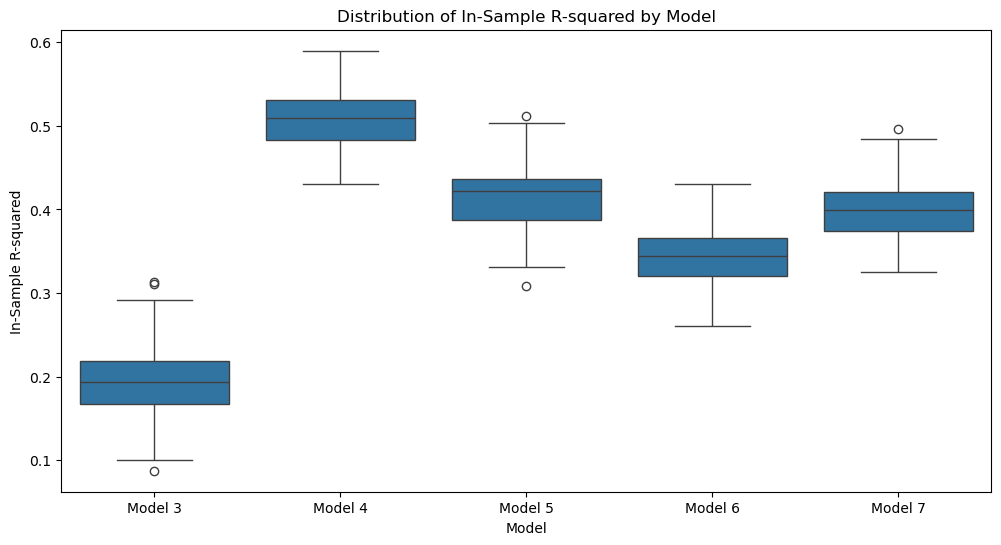

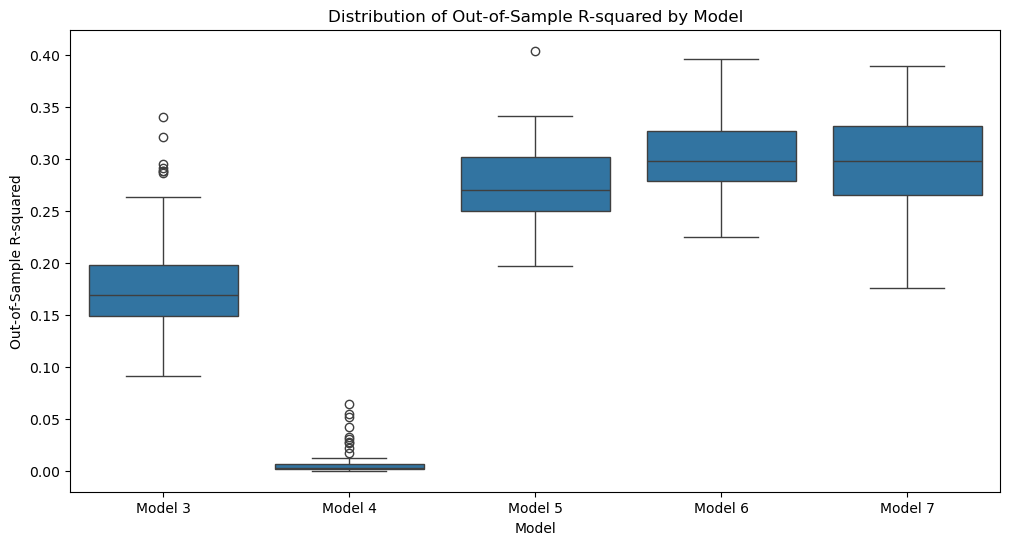

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from patsy import center, scale
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)

# Set 'None' as a category for 'Type 2' and replace NaN values specifically in 'Type 2' column
pokeaman['Type 2'] = pd.Categorical(pokeaman['Type 2']).add_categories(['None'])
pokeaman['Type 2'].fillna('None', inplace=True)

# Ensure consistent levels for categorical variables across train and test sets
pokeaman['Type 1'] = pd.Categorical(pokeaman['Type 1'])
pokeaman['Generation'] = pd.Categorical(pokeaman['Generation'])
pokeaman['Legendary'] = pd.Categorical(pokeaman['Legendary'])

# Now, perform the split
np.random.seed(130)
pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)

# Make sure test set uses the same categories as train set
pokeaman_test['Type 1'] = pokeaman_test['Type 1'].cat.set_categories(pokeaman_train['Type 1'].cat.categories)
pokeaman_test['Type 2'] = pokeaman_test['Type 2'].cat.set_categories(pokeaman_train['Type 2'].cat.categories)
pokeaman_test['Generation'] = pokeaman_test['Generation'].cat.set_categories(pokeaman_train['Generation'].cat.categories)
pokeaman_test['Legendary'] = pokeaman_test['Legendary'].cat.set_categories(pokeaman_train['Legendary'].cat.categories)

# Number of iterations
num_iterations = 50

# Initialize a list to collect results
results = []

# Loop over the number of iterations
for i in range(num_iterations):
    # Split the data into training and testing sets (without a random seed)
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Extract target variables
    y_train = pokeaman_train['HP']
    y_test = pokeaman_test['HP']
    
    ## Model 3
    model_spec3 = smf.ols(formula='HP ~ Attack + Defense', data=pokeaman_train)
    model3_fit = model_spec3.fit()
    yhat_model3_out_sample = model3_fit.predict(pokeaman_test)
    in_sample_r2_model3 = model3_fit.rsquared
    out_sample_r2_model3 = np.corrcoef(y_test, yhat_model3_out_sample)[0,1]**2
    
    ## Model 4
    model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
    model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
    model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
    model4_fit = model4_spec.fit()
    yhat_model4_out_sample = model4_fit.predict(pokeaman_test)
    in_sample_r2_model4 = model4_fit.rsquared
    out_sample_r2_model4 = np.corrcoef(y_test, yhat_model4_out_sample)[0,1]**2
    
    ## Model 5
    model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
    model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
    model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'
    model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
    model5_fit = model5_spec.fit()
    yhat_model5_out_sample = model5_fit.predict(pokeaman_test)
    in_sample_r2_model5 = model5_fit.rsquared
    out_sample_r2_model5 = np.corrcoef(y_test, yhat_model5_out_sample)[0,1]**2
    
    ## Model 6
    model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
    model6_linear_form += ' + I(Q("Type 1")=="Normal")'
    model6_linear_form += ' + I(Q("Type 1")=="Water")'
    model6_linear_form += ' + I(Generation==2)'
    model6_linear_form += ' + I(Generation==5)'
    model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
    model6_fit = model6_spec.fit()
    yhat_model6_out_sample = model6_fit.predict(pokeaman_test)
    in_sample_r2_model6 = model6_fit.rsquared
    out_sample_r2_model6 = np.corrcoef(y_test, yhat_model6_out_sample)[0,1]**2
    
    ## Model 7
    model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
    model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
    model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
    model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
    model7_linear_form_CS += ' + I(Generation==2)'
    model7_linear_form_CS += ' + I(Generation==5)'
    model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
    model7_CS_fit = model7_CS_spec.fit()
    yhat_model7_out_sample = model7_CS_fit.predict(pokeaman_test)
    in_sample_r2_model7 = model7_CS_fit.rsquared
    out_sample_r2_model7 = np.corrcoef(y_test, yhat_model7_out_sample)[0,1]**2
    
    # Collect the results
    results.append({
        'Iteration': i+1,
        'Model': 'Model 3',
        'InSampleR2': in_sample_r2_model3,
        'OutSampleR2': out_sample_r2_model3
    })
    results.append({
        'Iteration': i+1,
        'Model': 'Model 4',
        'InSampleR2': in_sample_r2_model4,
        'OutSampleR2': out_sample_r2_model4
    })
    results.append({
        'Iteration': i+1,
        'Model': 'Model 5',
        'InSampleR2': in_sample_r2_model5,
        'OutSampleR2': out_sample_r2_model5
    })
    results.append({
        'Iteration': i+1,
        'Model': 'Model 6',
        'InSampleR2': in_sample_r2_model6,
        'OutSampleR2': out_sample_r2_model6
    })
    results.append({
        'Iteration': i+1,
        'Model': 'Model 7',
        'InSampleR2': in_sample_r2_model7,
        'OutSampleR2': out_sample_r2_model7
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Visualize the In-Sample R-squared values
plt.figure(figsize=(12,6))
sns.boxplot(x='Model', y='InSampleR2', data=results_df)
plt.title('Distribution of In-Sample R-squared by Model')
plt.ylabel('In-Sample R-squared')
plt.show()

# Visualize the Out-of-Sample R-squared values
plt.figure(figsize=(12,6))
sns.boxplot(x='Model', y='OutSampleR2', data=results_df)
plt.title('Distribution of Out-of-Sample R-squared by Model')
plt.ylabel('Out-of-Sample R-squared')
plt.show()

The purpose of this demonstration is to assess the stability and generalizability of various model specifications in predicting a target variable (HP) across different training and testing splits. By repeatedly splitting the data, fitting the models, and comparing the "in-sample" versus "out-of-sample" R-squared values, we aim to understand how each model performs on new, unseen data and to observe any variability in performance that may emerge from these repeated random splits. In other words, the demonstration reveals whether a model consistently predicts well or if its performance fluctuates significantly with each split.

The concern here goes beyond just identifying overfitting, which would typically show high in-sample R-squared values that drop when applied to out-of-sample data. Interestingly, in some cases, we see the opposite: a model like model3_fit performs better on out-of-sample data than on in-sample data. This discrepancy can be surprising because it might initially suggest "underfitting," where the model doesn’t capture enough complexity to fit well on either dataset. However, underfitting would imply that a different model specification with additional features or interactions would yield consistently better performance—a scenario we’re not directly observing here.

What we're seeing instead is an effect of sampling variability or data dependency. When we split the data randomly, we may, by chance, end up with a training set that isn’t fully representative of the overall data distribution or captures specific patterns in the target variable (HP). This variability causes fluctuations in R-squared values, where a model might fit well to certain random splits (leading to unusually high in-sample or out-of-sample R-squared) while performing poorly on others.

Therefore, this approach helps us see not just how well a model generalizes but also how sensitive it is to the data it’s trained on. Models that show consistent R-squared values across splits are likely more robust and generalizable, while models that display significant variability in their performance might be too sensitive to the specifics of each split, revealing an underlying data dependency that could impact real-world predictions.

# Question 9

What this illustration basically does is it highlights the trade-offs between model complexity, interpretability, and generalizability. 

Although Model 7's complex structure initially appears advantageous with a higher in-sample R-squared, it does not generalize as effectively to new data, suggesting overfitting. This issue becomes apparent when we test both models in a sequential prediction scenario, where each model is trained on past Pokémon generations and evaluated on future ones. In this real-world setup, Model 7’s out-of-sample accuracy drops significantly, revealing that its intricate, high-order interactions capture noise specific to the training data rather than meaningful patterns. By contrast, Model 6, with its simpler design, maintains more consistent performance across different training and test splits. Its coefficients are also statistically significant, reinforcing the reliability of its predictors and making it easier to interpret the relationship between variables and Pokémon HP.

Model 6’s simplicity thus offers key advantages in interpretability and generalizability, which are critical in real-world predictive tasks where insights must be clear and stable across new data. Unlike Model 7, Model 6 avoids capturing spurious patterns, leading to a model that not only performs well on current data but is also more likely to be robust over time. These findings underscore the value of parsimony in modeling: simpler models often provide the best balance of reliable performance and interpretability, whereas complexity should only be added when it demonstrably improves prediction without sacrificing clarity or generalizability.

In [4]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3527564315182238
'Out of sample' R-squared: 0.2803172672444911
'In sample' R-squared:     0.3736472198802987
'Out of sample' R-squared: 0.30175303625023275
'In sample' R-squared:     0.3736472198802987 (original)
'Out of sample' R-squared: 0.30175303625023275 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)
'In sample' R-squared:     0.3736472198802987 (original)
'Out of sample' R-squared: 0.30175303625023275 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)
'In sample' R-squared:     0.3527564315182238 (original)
'Out of sample' R-squared: 0.2803172672444911 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)
'In sample' R-squared:     0.3527564315182238 (original

# ChatGPT Summary

In this conversation, we explored a series of questions and exercises around **building, evaluating, and refining predictive models** for Pokémon HP based on various features, using Python and the `statsmodels` and `sklearn` libraries.

### Key Topics Covered:

1. **Simple Model Creation and Train-Test Splits**:
   - We began with a **simple linear model** (`model3`) predicting HP based on Attack and Defense, using a 50/50 train-test split. We analyzed **in-sample and out-of-sample R-squared** values to understand model performance on training and test data.
   - Through this, we observed that a model can sometimes perform better on the test set than on the training set, which isn't indicative of underfitting. Rather, it highlights the variability introduced by random sampling in train-test splits.

2. **Model Refinement with Additional Predictors and Interaction Terms**:
   - We progressively added more predictors and interaction terms, moving from **`model5` to `model6` and `model7`**, to capture increasingly complex relationships. 
   - Each new model incorporated different combinations of features and interaction terms, such as `Generation`, Pokémon `Type`, and other stats (e.g., Special Attack and Special Defense), to increase explanatory power.
   - We also explored **categorical variables** and specific levels of predictors (e.g., "Normal" or "Water" type) to balance complexity with interpretability.

3. **Centering and Scaling**:
   - In `model7_CS`, we applied **centering and scaling** to mitigate multicollinearity, particularly important when working with interaction terms. Centering and scaling allowed for standardized, interpretable coefficients across continuous variables.

4. **Repeated Sampling to Assess Model Stability**:
   - To assess the robustness of model performance, we introduced a **for loop to conduct multiple train-test splits** without setting a fixed seed, repeatedly fitting `model3` to calculate and compare in-sample and out-of-sample R-squared values across 100 iterations.
   - Using Plotly, we visualized these results to see how variability in train-test splits impacts model performance. This showed how a model’s generalizability can fluctuate with different data samples, underscoring the value of **cross-validation** and **repeated sampling** in reliable model evaluation.

5. **Conceptual Insights and Interpretation**:
   - Throughout, we discussed concepts such as **overfitting, data sensitivity,** and **generalizability** and the purpose of examining repeated sampling.
   - By exploring variations in model structure, the conversation demonstrated how to balance model complexity with interpretability and stability, using different configurations of predictors and interaction terms to find the best-fit model for the data.

### Conclusion
This progression from simple to complex models and from single to multiple train-test splits offered a robust framework for understanding model evaluation. Each step highlighted the importance of **testing model stability, evaluating model assumptions, and understanding performance variability** to create predictive models that generalize well to new data. This conversation has built a comprehensive view of model evaluation in predictive analytics, focusing on interpreting results, model selection, and visual diagnostics.

# ChatGPT Link

https://chatgpt.com/share/6733cfc0-8668-8011-a6ec-b8dcb97ed2dd